In [121]:
from sympy import *
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np

# Setup Vars
fig = plt.figure(figsize=(18, 12))
x = Symbol('x')

# Custom Functions
def calculate(X, y):
  f = lambdify(x, y, 'numpy')
  f = np.vectorize(f)
  return f(X)

# Calculate yprime from
# https://stackoverflow.com/questions/9876290/how-do-i-compute-derivative-using-numpy
def yprime(y):
  return y.diff(x)

def getX0(X, y):
  for index, i in enumerate(X):
    if i == 0:
      return [i, y[index]]
  return None

def Slope0(X, y, yprime):
  y0 = abs(y[0])
  x0 = X[0]
  slope0 = abs(yprime[0])
  for index, slope in enumerate(yprime):
    if abs(slope) < slope0:
      slope0 = abs(slope)
      x0, y0 = X[index], y[index]
  return x0, y0

def outf(f, y):
  print('{:<40} :'.format(str(f)), y)
    

# X values
X = np.arange(-6, 7, 1)

# Math Functions
# 1°
# Declare
f_1a = x*2
f_1b = x*2 - 6
f_1c = (x+2)*2
# Calculate
y_1a = calculate(X, f_1a)
y_1aprime = calculate(X, yprime(f_1a))
y_1b = calculate(X, f_1b)
y_1bprime = calculate(X, yprime(f_1b))
y_1c = calculate(X, f_1c)
y_1cprime = calculate(X, yprime(f_1c))

# 2°
# Declare
f_2a = x**2
f_2b = x**2 - 6
f_2c = (x-2)**2
# Calculate
y_2a = calculate(X, f_2a)
y_2aprime = calculate(X, yprime(f_2a))
y_2b = calculate(X, f_2b)
y_2bprime = calculate(X, yprime(f_2b))
y_2c = calculate(X, f_2c)
y_2cprime = calculate(X, yprime(f_2c))

# 3°
# Declare
f_3a = x**3 - 2*(x**2) + 3*x
f_3b = x**3 - 2*(x**2) + 3*x - 6
f_3c = (x**3)/5*x - 2*(x**2) + 3*x
# Calculate
y_3a = calculate(X, f_3a)
y_3aprime = calculate(X, yprime(f_3a))
y_3b = calculate(X, f_2b)
y_3bprime = calculate(X, yprime(f_3b))
y_3c = calculate(X, f_2c)
y_3cprime = calculate(X, yprime(f_3c))

# Results
print("X values:")
print(X)
print("y values:")
print("-"*30,"1°", "-"*30)
outf(f_1a, y_1a)
outf(yprime(f_1a), y_1aprime)
outf(f_1b, y_1b)
outf(yprime(f_1b), y_1bprime)
outf(f_1c, y_1c)
outf(yprime(f_1c), y_1cprime)
print("-"*30,"2°", "-"*30)
outf(f_2a, y_2a)
outf(yprime(f_2a), y_2aprime)
outf(f_2b, y_2b)
outf(yprime(f_2b), y_2bprime)
outf(f_2c, y_2c)
outf(yprime(f_2c), y_2cprime)
print("-"*30,"3°", "-"*30)
outf(f_3a, y_3a)
outf(yprime(f_3a), y_3aprime)
outf(f_3b, y_3b)
outf(yprime(f_3b), y_3bprime)
outf(f_3c, y_3c)
outf(yprime(f_3c), y_3cprime)



X values:
[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6]
y values:
------------------------------ 1° ------------------------------
2*x                                      : [-12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12]
2                                        : [2 2 2 2 2 2 2 2 2 2 2 2 2]
2*x - 6                                  : [-18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6]
2                                        : [2 2 2 2 2 2 2 2 2 2 2 2 2]
2*x + 4                                  : [-8 -6 -4 -2  0  2  4  6  8 10 12 14 16]
2                                        : [2 2 2 2 2 2 2 2 2 2 2 2 2]
------------------------------ 2° ------------------------------
x**2                                     : [36 25 16  9  4  1  0  1  4  9 16 25 36]
2*x                                      : [-12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12]
x**2 - 6                                 : [30 19 10  3 -2 -5 -6 -5 -2  3 10 19 30]
2*x                                      : [-12 -10  

<Figure size 1296x864 with 0 Axes>

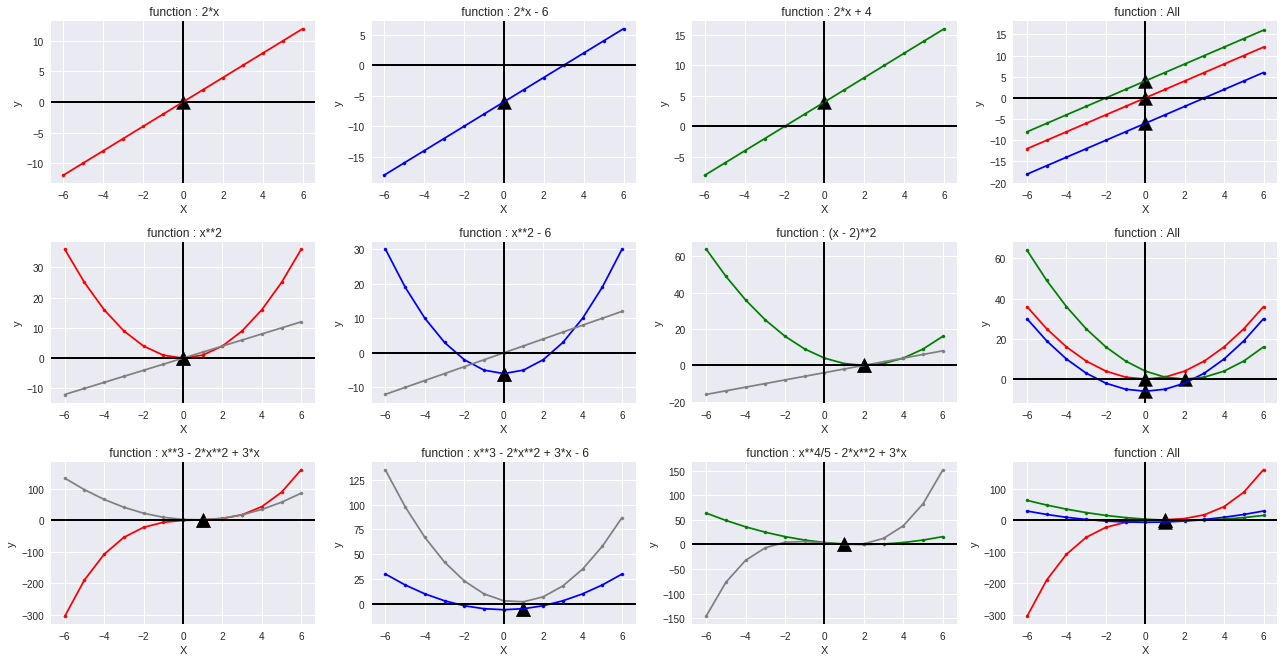

In [125]:
# https://colab.research.google.com/notebooks/charts.ipynb
fig = plt.figure(figsize=(18, 12))

def funcPlot(plt, X, y, p0, clr, fName):
  plt.scatter(X, y, color=clr, s = 10)
  plt.plot(X, y, color=clr)
  plt.scatter(p0[0], p0[1], color='black', marker='^', s = 200)
  plt.title(" function : " + str(fName))
  plt.axhline(linewidth=2, color='black')
  plt.axvline(linewidth=2, color='black')
  plt.xlabel("X")
  plt.ylabel("y")

# Visualising 
# 1°
plt.subplot2grid((4, 12), (0, 0), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_1a, getX0(X, y_1a), 'red', f_1a)
plt.subplot2grid((4, 12), (0, 3), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_1b, getX0(X, y_1b), 'blue', f_1b)
plt.subplot2grid((4, 12), (0, 6), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_1c, getX0(X, y_1c), 'green', f_1c)
plt.subplot2grid((4, 12), (0, 9), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_1a, getX0(X, y_1a), 'red', '')
funcPlot(plt, X, y_1b, getX0(X, y_1b), 'blue', '')
funcPlot(plt, X, y_1c, getX0(X, y_1c), 'green', 'All')
# 2°
plt.subplot2grid((4, 12), (1, 0), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_2a, Slope0(X, y_2a, y_2aprime), 'red', f_2a)
funcPlot(plt, X, y_2aprime, Slope0(X, y_2a, y_2aprime), 'gray', f_2a)
plt.subplot2grid((4, 12), (1, 3), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_2b, Slope0(X, y_2b, y_2bprime), 'blue', f_2b)
funcPlot(plt, X, y_2bprime, Slope0(X, y_2b, y_2bprime), 'gray', f_2b)
plt.subplot2grid((4, 12), (1, 6), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_2c, Slope0(X, y_2c, y_2cprime), 'green', f_2c)
funcPlot(plt, X, y_2cprime, Slope0(X, y_2c, y_2cprime), 'gray', f_2c)
plt.subplot2grid((4, 12), (1, 9), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_2a, Slope0(X, y_2a, y_2aprime), 'red', '')
funcPlot(plt, X, y_2b, Slope0(X, y_2b, y_2bprime), 'blue', '')
funcPlot(plt, X, y_2c, Slope0(X, y_2c, y_2cprime), 'green', 'All')
# 2°
plt.subplot2grid((4, 12), (2, 0), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_3a, Slope0(X, y_3a, y_3aprime), 'red', f_3a)
funcPlot(plt, X, y_3aprime, Slope0(X, y_3a, y_3aprime), 'gray', f_3a)
plt.subplot2grid((4, 12), (2, 3), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_3b, Slope0(X, y_3b, y_3bprime), 'blue', f_3b)
funcPlot(plt, X, y_3bprime, Slope0(X, y_3b, y_3bprime), 'gray', f_3b)
plt.subplot2grid((4, 12), (2, 6), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_3c, Slope0(X, y_3c, y_3cprime), 'green', f_3c)
funcPlot(plt, X, y_3cprime, Slope0(X, y_3c, y_3cprime), 'gray', f_3c)
plt.subplot2grid((4, 12), (2, 9), rowspan = 1, colspan = 3)
funcPlot(plt, X, y_3a, Slope0(X, y_3a, y_3aprime), 'red', '')
funcPlot(plt, X, y_3b, Slope0(X, y_3b, y_3bprime), 'blue', '')
funcPlot(plt, X, y_3c, Slope0(X, y_3c, y_3cprime), 'green', 'All')


plt.tight_layout()
plt.show()